# Autocorrelation
- PM10의 자기 상관성을 고려하여 몇 시간 단위까지 시간이 상관성이 있는지 조사한다.
- 상관성이 있는 시간만큼 데이터 셋에 전 단위 시간을 반영할 것이다.

### 패키지 로딩

In [10]:
### Data Handling
import numpy as np
import pandas as pd

### ACF Graph
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

### 데이터 로딩

In [11]:
### 데이터 로딩
train = pd.read_csv("C:/dust/data/train.csv")
### 필요없는 열 삭제
train.drop(columns = ["Unnamed: 0"],inplace = True)
### 시간 순서대로 열을 정렬
train.sort_values(by = ["datetime"],inplace = True)

### ACF 구하기

In [12]:
### acf를 구하기 위한 데이터 셋 만들기 -> 정제
acf = train[["datetime","PM10"]]
acf.index = train["datetime"]
acf.drop(columns = ["datetime"],inplace = True)
acf.fillna(method = "ffill",inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_13808\2601932546.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acf.drop(columns = ["datetime"],inplace = True)
C:\Users\user\AppData\Local\Temp\ipykernel_13808\2601932546.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acf.fillna(method = "ffill",inplace = True)


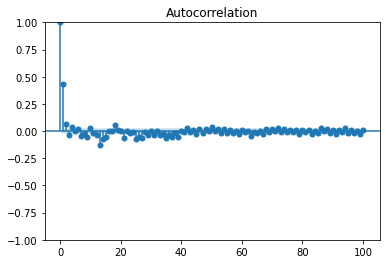

In [14]:
### acf 그래프 그리기
plot_acf(acf.diff(1).dropna(),lags = 100)
plt.show()